<a href="https://colab.research.google.com/github/SHAOBOCHAO/MLPR/blob/main/MLPR_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

('slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN', 'Road closed to all', 'Road closed to vehicles', 'No entry', 'No motor vehicles except motorcycles and mopeds', 'No trucks', 'No buses', 'No motorcycles or mopeds', 'No nonmotorized vehicle', 'No bicycles', 'No motor vehicles', 'No two-person motorcycles', 'No vehicles carrying dangerous goods', 'No vehicles weighing over 5.5 tonnes', 'No vehicles higher than 3.3 metres', 'No vehicles wider than 2.2 metres', 'Motor vehicles only', 'Bicycles only', 'Bicycles and Pedestrians only', 'Pedestrians only', 'Road closed to pedestrians', 'Straight ahead or left turn permitted', 'Straight ahead or right turn permittedTurn left', 'Turn right', 'No turns', 'Turn left or right', 'Directions permitted', 'Roundabout', 'Keep left', 'Keep right', 'No right turn crossing ahead', 'No U-turn', 'Two-stage right turn for mopeds', 'No two-stage right turn for mopeds', 'Cross_Inter_Warn', 'T_Right_Warn', 'T_Down_Warn', 'T_Left_Warn', 'Y_Inter_Warn', 'Tra

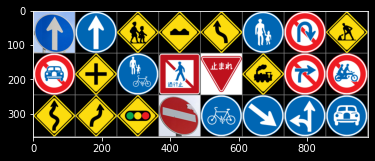

<Figure size 1440x1440 with 0 Axes>

torch.Size([24, 3, 120, 120])
tensor([35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
        35, 35, 35, 35, 35, 35])
epoch: 0, loss: 17.6195
epoch: 1, loss: 17.1141
epoch: 2, loss: 17.0377
epoch: 3, loss: 16.8627
epoch: 4, loss: 16.6226
epoch: 5, loss: 16.6116
epoch: 6, loss: 15.5951
epoch: 7, loss: 15.0471
epoch: 8, loss: 14.3374
epoch: 9, loss: 14.2044
epoch: 10, loss: 12.5761
epoch: 11, loss: 12.2148
epoch: 12, loss: 11.1306
epoch: 13, loss: 9.7505
epoch: 14, loss: 8.8640
epoch: 15, loss: 9.0860
epoch: 16, loss: 9.0169
epoch: 17, loss: 7.7489
epoch: 18, loss: 8.3222
epoch: 19, loss: 6.9508
epoch: 20, loss: 5.6994
epoch: 21, loss: 4.8506
epoch: 22, loss: 4.1138
epoch: 23, loss: 3.6857
epoch: 24, loss: 2.2811
epoch: 25, loss: 2.2608
epoch: 26, loss: 1.7855
epoch: 27, loss: 1.2410
epoch: 28, loss: 0.8806
epoch: 29, loss: 1.1271
epoch: 30, loss: 0.4554
epoch: 31, loss: 0.6746
epoch: 32, loss: 0.5463
epoch: 33, loss: 0.8654
epoch: 34, loss: 0.6213
epoch: 35, los

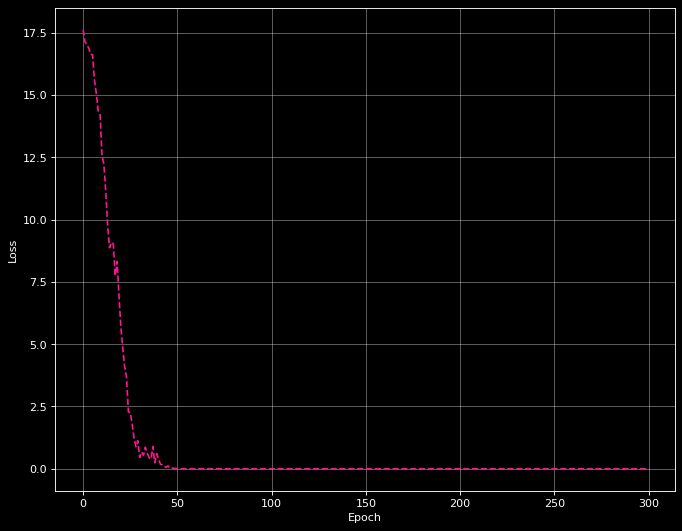

0.9861111111111112


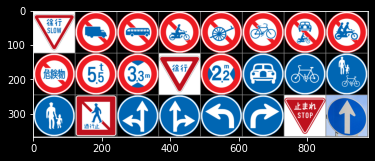

<Figure size 1440x1440 with 0 Axes>

['slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN', 'Road closed to all', 'Road closed to vehicles', 'No entry', 'No motor vehicles except motorcycles and mopeds', 'No trucks', 'No buses', 'No motorcycles or mopeds', 'No nonmotorized vehicle', 'No bicycles', 'No motor vehicles', 'No two-person motorcycles', 'No vehicles carrying dangerous goods', 'No vehicles weighing over 5.5 tonnes', 'No vehicles higher than 3.3 metres', 'No vehicles wider than 2.2 metres', 'Motor vehicles only', 'Bicycles only', 'Bicycles and Pedestrians only', 'Pedestrians only']
['slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN', 'Road closed to all', 'Road closed to vehicles', 'No entry', 'No motor vehicles except motorcycles and mopeds', 'No trucks', 'No buses', 'No motorcycles or mopeds', 'No nonmotorized vehicle', 'No bicycles', 'No motor vehicles', 'No two-person motorcycles', 'No vehicles carrying dangerous goods', 'No vehicles weighing over 5.5 tonnes', 'No vehicles higher than 3.3 metres', 'No vehi

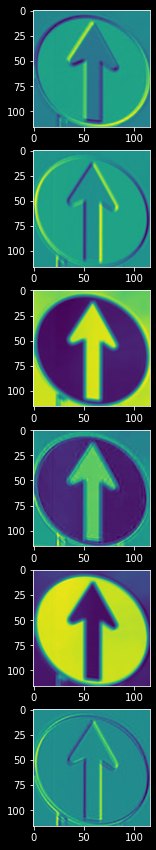

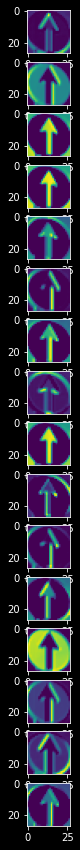

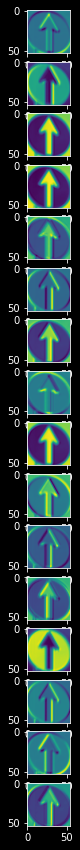

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms



#----------------------------------------------------------------------------------------------------
# Classes Declaration

classes = (
#Stop and slow down
'slow_EJ', 'slow_JP','stop_EJ','stop_JP','stop_EN',\
#Exclusions
"Road closed to all","Road closed to vehicles","No entry",\
"No motor vehicles except motorcycles and mopeds","No trucks",\
"No buses","No motorcycles or mopeds","No nonmotorized vehicle",\
"No bicycles","No motor vehicles","No two-person motorcycles",\
"No vehicles carrying dangerous goods","No vehicles weighing over 5.5 tonnes",\
"No vehicles higher than 3.3 metres","No vehicles wider than 2.2 metres",\
"Motor vehicles only","Bicycles only","Bicycles and Pedestrians only",\
"Pedestrians only","Road closed to pedestrians",\

#Turns

"Straight ahead or left turn permitted","Straight ahead or right turn permitted"\
"Turn left","Turn right","No turns","Turn left or right","Directions permitted",\
"Roundabout","Keep left","Keep right","No right turn crossing ahead",\
"No U-turn","Two-stage right turn for mopeds","No two-stage right turn for mopeds",\

#Warning signs
"Cross_Inter_Warn","T_Right_Warn","T_Down_Warn","T_Left_Warn","Y_Inter_Warn",\
"Traffic_Circle","Right_Curve_Warn","Left_Curve_Warn","Right_Direct_Warn","Left_Direct_Warn",\
"Right_Stright_Warn","Left_Stright_Warn","Continue_Right_Stright_Warn","Continue_Left_Stright",\
"Succession of more than two curves to the right","Succession of more than two curves to the Left",\
"Railroad crossing ahead","Railroad crossing ahead","School area","Traffic lights ahead",\
"Slippery surface","Falling rocks","Bumpy road","Traffic merges from the left",\
"Left lane ends","Road narrows on both sides","Two-way traffic ahead",\
"Steep descent (10%, 1:10)","Steep ascent (10%, 1:10)",\
"Roadworks","Dangerous wind gusts","Wild animals crossing (deer)","Other dangers"
)


print(classes)
print(len(classes))


#----------------------------------------------------------------------------------------------------
# Load Datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])

trainset = torchvision.datasets.ImageFolder(root='./data/my_traffic_sign_dataset/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='./data/my_traffic_sign_dataset/test', transform=transform)
print(trainset)


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.figure(figsize=(20,20))
    plt.show()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=24,shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=24,shuffle=False, num_workers=2)

dataiter = iter(trainloader)

x, y = dataiter.next()
imshow(torchvision.utils.make_grid(x))
print(x.shape)
#print([classes[yi] for yi in y])


#----------------------------------------------------------------------------------------------------
# Construct network and initializing


'''
------------------------------------------------
| Calculating the Hidden Layer SIze 
| Kernel = 5x5                                
| Pooling = 2x2                              
|                                                  
| (120-5+1)=116                           
| 116/2 = 58->58x58
| Hidden Layer 1:6x58x58
|
| (58-5+1) = 54
| 54/2 = 27
| Hidden Layer 2:16x27x27
------------------------------------------------
'''

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 27 * 27, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 100)
        #Need to change the output of the last 
        #full connection layer to meet the num of classes
        self.fc4 = nn.Linear(100, 72)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 27 * 27)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

cnn = CNN()
x, y = dataiter.next()
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print(pred_y)

#----------------------------------------------------------------------------------------------------
# Training
from itertools import islice
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cnn = CNN()
cnn.to(device)
#optimizer = optim.SGD(cnn.parameters(), lr = 0.01)
# adaptive optimization - Adam
optimizer = optim.Adam(cnn.parameters())
import warnings
warnings.filterwarnings('ignore')

x_epoch = []
y_loss = []
for epoch in range(300):
    sumloss = 0.0
    for data in trainloader:
        x, y = data
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        a = cnn(x)
        loss = F.cross_entropy(a, y)
        loss.backward()
        optimizer.step()
        sumloss += loss.item()
    print('epoch: {}, loss: {:.4f}'.format(epoch, sumloss))
    x_epoch.append(epoch)
    y_loss.append(sumloss)
    #print(x_epoch)
    #print(y_loss)

# Output the epochs-loss line graph
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.figure(figsize = (10,8),dpi=80)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha=0.4)
plt.plot(x_epoch,y_loss,color='deeppink',linestyle='--')

plt.show()


correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        x, y = data
        x = x.to(device)
        y = y.to(device)          
        a = cnn(x)
        pred_y = torch.argmax(a, dim=1)
        correct += (pred_y == y).sum().item()
        total += pred_y.size(0)

print(correct / total)

dataiter = iter(testloader)


x, y = dataiter.next()
imshow(torchvision.utils.make_grid(x))
x = x.to(device)
y = y.to(device)
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print([classes[yi] for yi in pred_y])
print([classes[yi] for yi in y])

#----------------------------------------------------------------------------------------------------
# Output the structure of CNN using 2 different library
print(cnn)
import hiddenlayer as h
# 72 pieces of image - 3 channels 120x120
vis_graph = h.build_graph(cnn, torch.zeros([72 ,3, 120, 120]))   
vis_graph.theme = h.graph.THEMES["blue"].copy()     #
vis_graph.save("./demo1.png")   #

from torchviz import make_dot
x = torch.randn(72, 3, 120, 120).requires_grad_(True)   
y = cnn(x)    
MyCNNVis = make_dot(y, params=dict(list(cnn.named_parameters()) + [('x', x)]))
MyCNNVis.format = "png"
MyCNNVis.directory = "data"
MyCNNVis.view()

#----------------------------------------------------------------------------------------------------
# Visualize the middle layer of CNN
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

#Choose a random index of image 
IDX = 24
print("-------Conv1-------")
cnn.conv1.register_forward_hook(get_activation('conv1'))
data, _ = trainset[IDX]
data.unsqueeze_(0)
output = cnn(data)
act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
print(axarr)
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])    

print("-------Pool-------")
cnn.pool.register_forward_hook(get_activation('pool'))
data, _ = trainset[IDX]
data.unsqueeze_(0)
output = cnn(data)
act = activation['pool'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]) 

print("-------Conv2-------")
cnn.conv2.register_forward_hook(get_activation('conv2'))
data, _ = trainset[IDX]
data.unsqueeze_(0)
output = cnn(data)
act = activation['conv2'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]) 
#----------------------------------------------------------------------------------------------------


('slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN', 'Road closed to all', 'Road closed to vehicles', 'No entry', 'No motor vehicles except motorcycles and mopeds', 'No trucks', 'No buses', 'No motorcycles or mopeds', 'No nonmotorized vehicle', 'No bicycles', 'No motor vehicles', 'No two-person motorcycles', 'No vehicles carrying dangerous goods', 'No vehicles weighing over 5.5 tonnes', 'No vehicles higher than 3.3 metres', 'No vehicles wider than 2.2 metres', 'Motor vehicles only', 'Bicycles only', 'Bicycles and Pedestrians only', 'Pedestrians only', 'Road closed to pedestrians', 'Straight ahead or left turn permitted', 'Straight ahead or right turn permittedTurn left', 'Turn right', 'No turns', 'Turn left or right', 'Directions permitted', 'Roundabout', 'Keep left', 'Keep right', 'No right turn crossing ahead', 'No U-turn', 'Two-stage right turn for mopeds', 'No two-stage right turn for mopeds', 'Cross_Inter_Warn', 'T_Right_Warn', 'T_Down_Warn', 'T_Left_Warn', 'Y_Inter_Warn', 'Tra

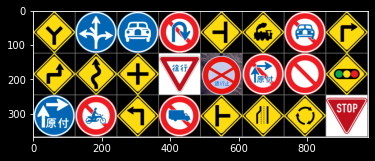

<Figure size 1440x1440 with 0 Axes>

torch.Size([24, 3, 120, 120])
tensor([ 2, 14,  2,  2,  2,  2, 14, 14,  2,  2, 14,  2, 14,  2,  2,  2, 14,  2,
         2,  2,  2, 14, 14,  2])
epoch: 0, loss: 17.1550
epoch: 1, loss: 17.1145
epoch: 2, loss: 17.0821
epoch: 3, loss: 17.1061
epoch: 4, loss: 17.0992
epoch: 5, loss: 17.0716
epoch: 6, loss: 17.1189
epoch: 7, loss: 17.0862
epoch: 8, loss: 17.1088
epoch: 9, loss: 17.0701
epoch: 10, loss: 17.0789
epoch: 11, loss: 17.0575
epoch: 12, loss: 17.0894
epoch: 13, loss: 17.1296
epoch: 14, loss: 17.1137
epoch: 15, loss: 17.1131
epoch: 16, loss: 17.0863
epoch: 17, loss: 17.0989
epoch: 18, loss: 17.0854
epoch: 19, loss: 17.1050
epoch: 20, loss: 17.0707
epoch: 21, loss: 17.0898
epoch: 22, loss: 17.0906
epoch: 23, loss: 17.0582
epoch: 24, loss: 17.0777
epoch: 25, loss: 17.0633
epoch: 26, loss: 17.0942
epoch: 27, loss: 17.1041
epoch: 28, loss: 17.0799
epoch: 29, loss: 17.0523
epoch: 30, loss: 17.0669
epoch: 31, loss: 17.0571
epoch: 32, loss: 17.0437
epoch: 33, loss: 17.0666
epoch: 34, loss: 

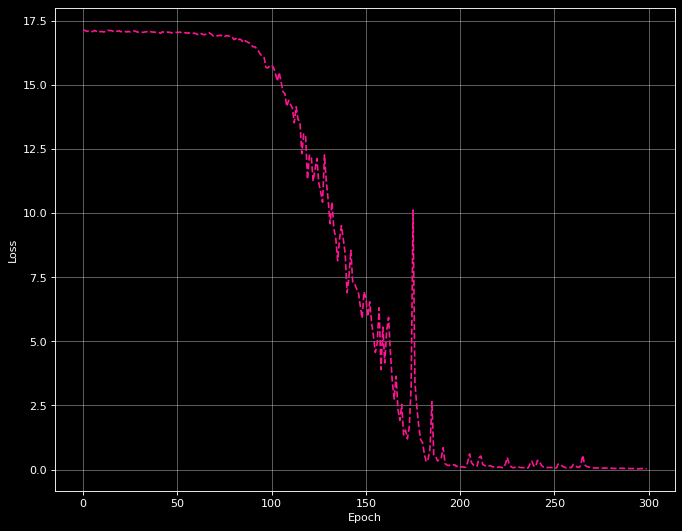

0.9861111111111112


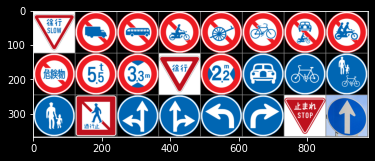

<Figure size 1440x1440 with 0 Axes>

['slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN', 'Road closed to all', 'Road closed to vehicles', 'No entry', 'No motor vehicles except motorcycles and mopeds', 'No trucks', 'No buses', 'No motorcycles or mopeds', 'No nonmotorized vehicle', 'No bicycles', 'No motor vehicles', 'No two-person motorcycles', 'No vehicles carrying dangerous goods', 'No vehicles weighing over 5.5 tonnes', 'No vehicles higher than 3.3 metres', 'No vehicles wider than 2.2 metres', 'Motor vehicles only', 'Bicycles only', 'Bicycles and Pedestrians only', 'Pedestrians only']
['slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN', 'Road closed to all', 'Road closed to vehicles', 'No entry', 'No motor vehicles except motorcycles and mopeds', 'No trucks', 'No buses', 'No motorcycles or mopeds', 'No nonmotorized vehicle', 'No bicycles', 'No motor vehicles', 'No two-person motorcycles', 'No vehicles carrying dangerous goods', 'No vehicles weighing over 5.5 tonnes', 'No vehicles higher than 3.3 metres', 'No vehi

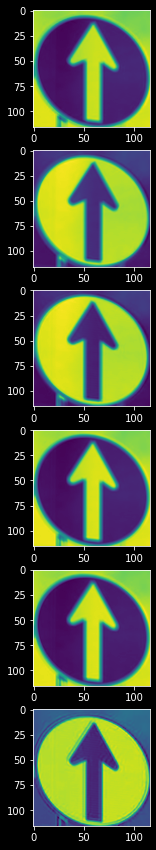

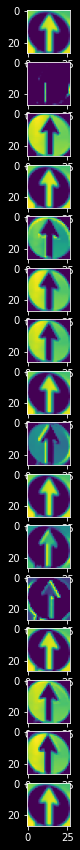

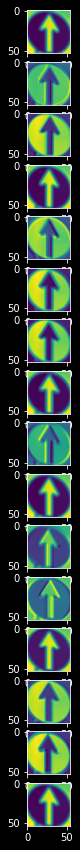

In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms



#----------------------------------------------------------------------------------------------------
# Classes Declaration

classes = (
#Stop and slow down
'slow_EJ', 'slow_JP','stop_EJ','stop_JP','stop_EN',\
#Exclusions
"Road closed to all","Road closed to vehicles","No entry",\
"No motor vehicles except motorcycles and mopeds","No trucks",\
"No buses","No motorcycles or mopeds","No nonmotorized vehicle",\
"No bicycles","No motor vehicles","No two-person motorcycles",\
"No vehicles carrying dangerous goods","No vehicles weighing over 5.5 tonnes",\
"No vehicles higher than 3.3 metres","No vehicles wider than 2.2 metres",\
"Motor vehicles only","Bicycles only","Bicycles and Pedestrians only",\
"Pedestrians only","Road closed to pedestrians",\

#Turns

"Straight ahead or left turn permitted","Straight ahead or right turn permitted"\
"Turn left","Turn right","No turns","Turn left or right","Directions permitted",\
"Roundabout","Keep left","Keep right","No right turn crossing ahead",\
"No U-turn","Two-stage right turn for mopeds","No two-stage right turn for mopeds",\

#Warning signs
"Cross_Inter_Warn","T_Right_Warn","T_Down_Warn","T_Left_Warn","Y_Inter_Warn",\
"Traffic_Circle","Right_Curve_Warn","Left_Curve_Warn","Right_Direct_Warn","Left_Direct_Warn",\
"Right_Stright_Warn","Left_Stright_Warn","Continue_Right_Stright_Warn","Continue_Left_Stright",\
"Succession of more than two curves to the right","Succession of more than two curves to the Left",\
"Railroad crossing ahead","Railroad crossing ahead","School area","Traffic lights ahead",\
"Slippery surface","Falling rocks","Bumpy road","Traffic merges from the left",\
"Left lane ends","Road narrows on both sides","Two-way traffic ahead",\
"Steep descent (10%, 1:10)","Steep ascent (10%, 1:10)",\
"Roadworks","Dangerous wind gusts","Wild animals crossing (deer)","Other dangers"
)


print(classes)
print(len(classes))


#----------------------------------------------------------------------------------------------------
# Load Datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])

trainset = torchvision.datasets.ImageFolder(root='./data/my_traffic_sign_dataset/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='./data/my_traffic_sign_dataset/test', transform=transform)
print(trainset)


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.figure(figsize=(20,20))
    plt.show()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=24,shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=24,shuffle=False, num_workers=2)

dataiter = iter(trainloader)

x, y = dataiter.next()
imshow(torchvision.utils.make_grid(x))
print(x.shape)
#print([classes[yi] for yi in y])


#----------------------------------------------------------------------------------------------------
# Construct network and initializing


'''
------------------------------------------------
| Calculating the Hidden Layer SIze 
| Kernel = 5x5                                
| Pooling = 2x2                              
|                                                  
| (120-5+1)=116                           
| 116/2 = 58->58x58
| Hidden Layer 1:6x58x58
|
| (58-5+1) = 54
| 54/2 = 27
| Hidden Layer 2:16x27x27
------------------------------------------------
'''

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 27 * 27, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 100)
        #Need to change the output of the last 
        #full connection layer to meet the num of classes
        self.fc4 = nn.Linear(100, 72)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 27 * 27)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

cnn = CNN()
x, y = dataiter.next()
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print(pred_y)

#----------------------------------------------------------------------------------------------------
# Training
from itertools import islice
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cnn = CNN()
cnn.to(device)
optimizer = optim.SGD(cnn.parameters(), lr = 0.01)

import warnings
warnings.filterwarnings('ignore')

x_epoch = []
y_loss = []
for epoch in range(300):
    sumloss = 0.0
    for data in trainloader:
        x, y = data
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        a = cnn(x)
        loss = F.cross_entropy(a, y)
        loss.backward()
        optimizer.step()
        sumloss += loss.item()
    print('epoch: {}, loss: {:.4f}'.format(epoch, sumloss))
    x_epoch.append(epoch)
    y_loss.append(sumloss)
    #print(x_epoch)
    #print(y_loss)

# Output the epochs-loss line graph
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.figure(figsize = (10,8),dpi=80)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha=0.4)
plt.plot(x_epoch,y_loss,color='deeppink',linestyle='--')

plt.show()


correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        x, y = data
        x = x.to(device)
        y = y.to(device)          
        a = cnn(x)
        pred_y = torch.argmax(a, dim=1)
        correct += (pred_y == y).sum().item()
        total += pred_y.size(0)

print(correct / total)

dataiter = iter(testloader)


x, y = dataiter.next()
imshow(torchvision.utils.make_grid(x))
x = x.to(device)
y = y.to(device)
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print([classes[yi] for yi in pred_y])
print([classes[yi] for yi in y])

#----------------------------------------------------------------------------------------------------
# Output the structure of CNN using 2 different library
print(cnn)
import hiddenlayer as h
# 72 pieces of image - 3 channels 120x120
vis_graph = h.build_graph(cnn, torch.zeros([72 ,3, 120, 120]))   
vis_graph.theme = h.graph.THEMES["blue"].copy()     #
vis_graph.save("./demo1.png")   #

from torchviz import make_dot
x = torch.randn(72, 3, 120, 120).requires_grad_(True)   
y = cnn(x)    
MyCNNVis = make_dot(y, params=dict(list(cnn.named_parameters()) + [('x', x)]))
MyCNNVis.format = "png"
MyCNNVis.directory = "data"
MyCNNVis.view()

#----------------------------------------------------------------------------------------------------
# Visualize the middle layer of CNN
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

#Choose a random index of image 
IDX = 24
print("-------Conv1-------")
cnn.conv1.register_forward_hook(get_activation('conv1'))
data, _ = trainset[IDX]
data.unsqueeze_(0)
output = cnn(data)
act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
print(axarr)
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])    

print("-------Pool-------")
cnn.pool.register_forward_hook(get_activation('pool'))
data, _ = trainset[IDX]
data.unsqueeze_(0)
output = cnn(data)
act = activation['pool'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]) 

print("-------Conv2-------")
cnn.conv2.register_forward_hook(get_activation('conv2'))
data, _ = trainset[IDX]
data.unsqueeze_(0)
output = cnn(data)
act = activation['conv2'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]) 
#----------------------------------------------------------------------------------------------------


Populating the interactive namespace from numpy and matplotlib
Dataset ImageFolder
    Number of datapoints: 5
    Root location: ./data/my_traffic_sign_dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
('slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP', 'stop_EN')


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imshow']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


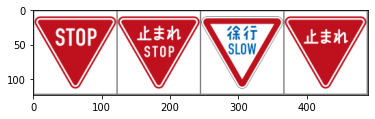

torch.Size([4, 3, 120, 120])
['stop_EN', 'stop_EJ', 'slow_EJ', 'stop_JP']
tensor([3])
epoch: 0, loss: 3.2191
epoch: 1, loss: 3.3141
epoch: 2, loss: 3.1984
epoch: 3, loss: 3.1641
epoch: 4, loss: 3.2608
epoch: 5, loss: 3.3585
epoch: 6, loss: 3.2219
epoch: 7, loss: 3.1297
epoch: 8, loss: 3.0523
epoch: 9, loss: 3.1976
0.2


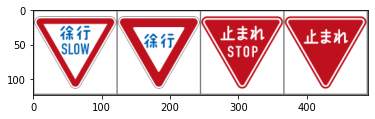

['slow_EJ', 'slow_EJ', 'slow_EJ', 'slow_EJ']
['slow_EJ', 'slow_JP', 'stop_EJ', 'stop_JP']
CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=11664, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)
-------Conv1-------
-------Pool-------
-------Conv2-------


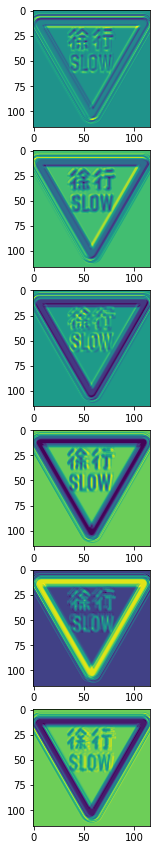

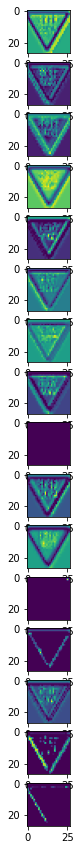

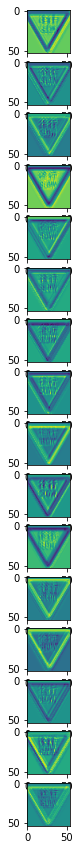

In [ ]:
%pylab inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])



trainset = torchvision.datasets.ImageFolder(root='./data/my_traffic_sign_dataset/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='./data/my_traffic_sign_dataset/test', transform=transform)
print(trainset)

classes = ('slow_EJ', 'slow_JP','stop_EJ','stop_JP','stop_EN')
print(classes)


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

dataiter = iter(trainloader)

x, y = dataiter.next()
imshow(torchvision.utils.make_grid(x))
print(x.shape)
print([classes[yi] for yi in y])

'''
kernel = 5
(120-5+1)=116
pooling = 2X2
116/2 = 58
58X58

HIDDEN 1:6X58X58

58-5+1 = 54
54/2 = 27
HIDDEN 2:16X27X27

'''
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 27 * 27, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 16 * 27 * 27)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = F.relu(self.fc2(x))
        #print(x.shape)
        x = self.fc3(x)
        #print(x.shape)
        return x

cnn = CNN()
x, y = dataiter.next()
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print(pred_y)

from itertools import islice
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cnn = CNN()
cnn.to(device)
optimizer = optim.SGD(cnn.parameters(), lr = 0.01)
for epoch in range(10):
    sumloss = 0.0
    # In an environment with sufficient computing resources, it is better to use all the data.
    # （計算資源が十分ある環境では，全てのデータを使う方が良い）
    for data in trainloader:
    #for data in islice(trainloader, 250): # Using only 250 batches
        x, y = data
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        a = cnn(x)
        #---for visualization output
        datax = x
        output = cnn(datax)
        #--
        loss = F.cross_entropy(a, y)
        loss.backward()
        optimizer.step()
        sumloss += loss.item()
    print('epoch: {}, loss: {:.4f}'.format(epoch, sumloss))


correct = 0
total = 0

with torch.no_grad():


    for data in testloader:
        x, y = data
        x = x.to(device)
        y = y.to(device)          
        a = cnn(x)
        pred_y = torch.argmax(a, dim=1)
        correct += (pred_y == y).sum().item()
        total += pred_y.size(0)

print(correct / total)

dataiter = iter(testloader)

x, y = dataiter.next()
imshow(torchvision.utils.make_grid(x))
x = x.to(device)
y = y.to(device)
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print([classes[yi] for yi in pred_y])
print([classes[yi] for yi in y])

print(cnn)
import hiddenlayer as h
vis_graph = h.build_graph(cnn, torch.zeros([5 ,3, 120, 120]))   # 获取绘制图像的对象 5 3channel 120x120
vis_graph.theme = h.graph.THEMES["blue"].copy()     # 指定主题颜色
vis_graph.save("./demo1.png")   # 保存图像的路径

from torchviz import make_dot
x = torch.randn(5, 3, 120, 120).requires_grad_(True)  # 定义一个网络的输入值
y = cnn(x)    # 获取网络的预测值
MyCNNVis = make_dot(y, params=dict(list(cnn.named_parameters()) + [('x', x)]))
MyCNNVis.format = "png"
# 指定文件生成的文件夹
MyCNNVis.directory = "data"
# 生成文件
MyCNNVis.view()

#------------------------
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


cnn.conv1.register_forward_hook(get_activation('conv1'))
data, _ = trainset[0]
data.unsqueeze_(0)
output = cnn(data)
print("-------Conv1-------")
act = activation['conv1'].squeeze()
#print("-----")
#print(act.size(0))
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
print(axarr)
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])    

cnn.pool.register_forward_hook(get_activation('pool'))
data, _ = trainset[0]
data.unsqueeze_(0)
output = cnn(data)
print("-------Pool-------")
act = activation['pool'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]) 

cnn.conv2.register_forward_hook(get_activation('conv2'))
data, _ = trainset[0]
data.unsqueeze_(0)
output = cnn(data)
print("-------Conv2-------")
act = activation['conv2'].squeeze()
fig, axarr = plt.subplots(act.size(0),figsize=(15,15))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]) 




#-----------------


In [ ]:
pip install hiddenlayer

In [ ]:
pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=dba884593a25dd5f5cd281c350ef407d07f062dd3e8f0bea2414556d7f061277
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz
